<a href="https://colab.research.google.com/github/JuliaVin23/Projects/blob/main/%D0%AE%D0%BB%D0%B8%D1%8F_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2_%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Название проекта: Влияние рекламы на продаваемость продукта


## I. Введение
   - Цели и задачи проекта
   - Обзор проекта

**Цель проекта**: провести A/B тестирование и заключить, влияет ли размещение рекламы на сайтах на продавемость продукта

**Нулевая гипотеза**: Размещение рекламы на сайте не влияет на продаваемость продукта.

**Альтернативная гипотеза**: Размещение рекламы на сайте способствует продаваемости продукта.

Задачи:

1. Найти датасет с результатами эксперимента о размещении рекламы товара на платформе Kaggle
2. Произвести предварительную обработку данных при помощи библитотеки Pandas
3. Произвести анализ связи между переменными
4. Визуализировать связи между переменными
5. Посчитать процент купивших товар пользователей среди видевших рекламу
6. Посчитать статистическую значимость полученного результата при помощи библиотеки SciPy

Результаты проекта могут использоваться в сфере маркетинга в качестве примера A/B тестирования на предмет влияния рекламы на продажи продукта.

## II. Датасет

Датасет выгружен по ссылке [marketing A/B testing.com](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing).


In [ ]:
import pandas as pd

marketing = pd.read_csv("marketing_AB.csv")
marketing.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
marketing.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [ ]:
marketing.shape

(588101, 7)

Датасет состоит из 588101 строки и 7 столбцов и содержит информацию о:

1. уникальном ID каждого пользователя (user id);
2. принадлежности пользователя к экспериментальной группе, которая видела рекламу, или к контрольной группе, которая не видела рекламу (test group: видел рекламу - ad, видел только public service announcement - psa);
3. о том, купил ли пользователь товар (converted: если купил - True, если не купил - False);
4. об общем количестве увиденной пользователем рекламы (total ads);
5. о дне и часе, в которые пользователь видел больше всего рекламы (most ads day и most ads hour соответственно).

In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


В датасете хранятся данные **трех типов**: булевы, числовые и строковые.

Для дальнейшей визуализации результатов анализа данных потребуется преобразование булевых и строковых данных в числовые.

Весь датасет является средним по объему - 27.5 MB, поэтому процесс обработки данных не должен занять много времени.

In [ ]:
marketing.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


Из числовых данных для дальнейшего анализа будут важны данные об общем количестве увиденной пользователем рекламы и часе, когда реклама попадалась пользователю больше всего.

Исходя из таблицы, в среднем пользователи видели около 25 реклам, однако важно отметить высокое стандартное отклонение почти на 44 единицы, что говорит нам о весомом разбросе в количестве увиденной пользователями рекламы (т.е. этот параметр оказался достаточно индивидуальным для каждого пользователя).
Минимальное количество рекламы составило 1, а максимальное - 2065.

Что касается самого насыщенного рекламой часа, то его минимальное, максимальное и среднее значения для исследования не представляют особой важности. При этом стоит упомянуть стандартное отклонение в почти 5 единиц, которое само по себе достаточно низкое, однако для ряда чисел 0-23 достаточно значительное. Кроме того, обратив внимание на четверть, половину и две четверти выборки (значения 11, 14 и 18), уже сейчас можно сделать вывод о том, что чаще всего пользователи видели рекламу во второй половине дня.

   - Чистка данных:
     - Удаление ненужных столбцов

In [ ]:
# удаление ненужных столбцов
columns_to_drop = ['Unnamed: 0', 'user id']
target_marketing = marketing.drop(columns=columns_to_drop)

target_marketing.head(10)

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
5,ad,False,734,Saturday,10
6,ad,False,264,Wednesday,13
7,ad,False,17,Sunday,18
8,ad,False,21,Tuesday,19
9,ad,False,142,Monday,14



## III. Предварительный анализ данных

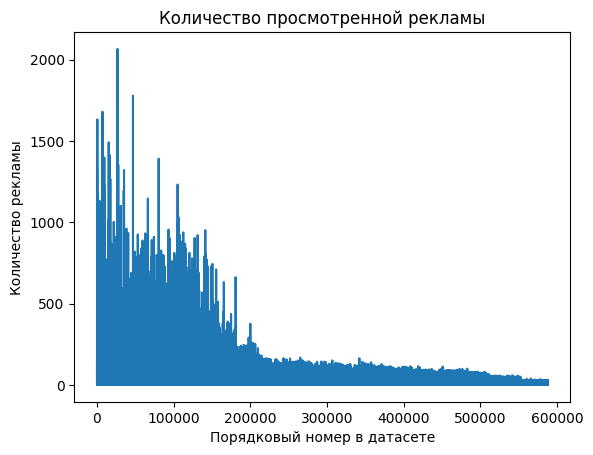

In [ ]:
# Количество просмотренной рекламы - total ads
import matplotlib.pyplot as plt

target_marketing["total ads"].plot()
plt.xlabel('Порядковый номер в датасете')
plt.ylabel('Количество рекламы')
plt.title('Количество просмотренной рекламы')
plt.show()

График подчеркивает высказанную ранее мысль о том, что количество увиденной пользователями рекламы сильно разнится.

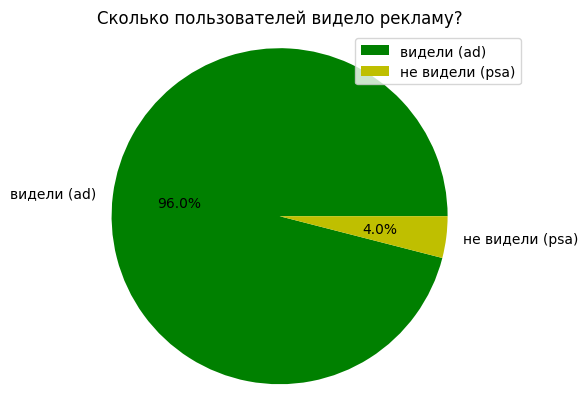

In [ ]:
# Количество пользователей, видевших рекламу - test group (данные о процентах взяты с сайта датасета)
labels = ['видели (ad)', 'не видели (psa)']
sizes = [96, 4]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['g', 'y'])
ax1.axis('equal')
ax1.legend(loc = 'best')
plt.title('Сколько пользователей видело рекламу?')
plt.show()

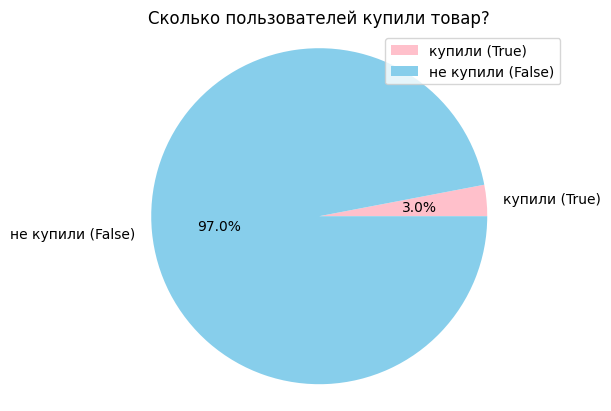

In [ ]:
# Количество пользователей, купивших товар - converted (данные о процентах взяты с сайта датасета)

labels = ['купили (True)', 'не купили (False)']
sizes = [3, 97]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', colors = ['pink', 'skyblue'])
ax1.axis('equal')
ax1.legend(loc = 'best')
plt.title('Сколько пользователей купили товар?')
plt.show()

Две круговые диаграммы демострируют несбалансированность выборки: подавляющее большинство пользователей видели рекламу, а также практически тот же процент пользователей не купили товар.

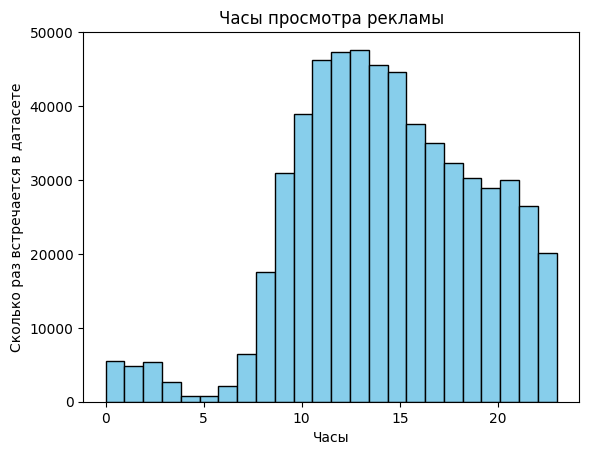

In [ ]:
# Количество часов с наибольшим числом рекламы - most ads hour
plt.hist(target_marketing['most ads hour'], bins = 24, color = 'skyblue', edgecolor = 'black')

plt.xlabel('Часы')
plt.ylabel('Сколько раз встречается в датасете')
plt.title('Часы просмотра рекламы')

plt.show()

Согласно диаграмме, чаще всего пользователи встречали рекламу с 11 до 15 часов. В целом, основная доля рекламного времени - с 9 до 23 часов, то есть вполне стандартное время активности пользователей.

- **Преобразование качественных данных в числовые**

Для визуализации данных о дне недели и дальнейшей работы с категориальными данными их необходимо преобразовать в числовые.

In [ ]:
# приведение данных столбца most ads day к типу категорий, чтобы в дальнейшем выстроить дни недели в правильном порядке
cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories = cats, ordered = True)
target_marketing['most ads day'] = target_marketing['most ads day'].astype(cat_type)

target_marketing['most ads day'].head()

0     Monday
1    Tuesday
2    Tuesday
3    Tuesday
4     Friday
Name: most ads day, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' <
                         'Saturday']

In [ ]:
# сортировка всех данных по дням недели
days_ordered = target_marketing.sort_values(by = 'most ads day')
days_ordered

,test group,converted,total ads,most ads day,most ads hour
294050,ad,False,22,Sunday,17
342262,ad,False,20,Sunday,9
342264,ad,False,15,Sunday,10
342265,ad,False,7,Sunday,9
342266,ad,False,5,Sunday,9
...,...,...,...,...,...
390619,ad,False,6,Saturday,11
469200,ad,False,28,Saturday,21
267646,ad,False,15,Saturday,11
267609,ad,False,14,Saturday,15


In [ ]:
# преобразование всех категориальных данных в числовые
cat_columns = days_ordered.select_dtypes(['object', 'bool', 'category']).columns

days_ordered[cat_columns] = days_ordered[cat_columns].apply (lambda x: pd.factorize (x)[ 0 ])
days_ordered

,test group,converted,total ads,most ads day,most ads hour
294050,0,0,22,0,17
342262,0,0,20,0,9
342264,0,0,15,0,10
342265,0,0,7,0,9
342266,0,0,5,0,9
...,...,...,...,...,...
390619,0,0,6,6,11
469200,0,0,28,6,21
267646,0,0,15,6,11
267609,0,0,14,6,15


Таким образом, получилось следующее:

пользователи, видевшие рекламу - 0;     
не видевшие рекламу - 1

пользователи, купившие товар - 1;       
не купившие товар - 0

дни недели по порядку: Sunday - 0, Monday - 1, ... Saturday - 6

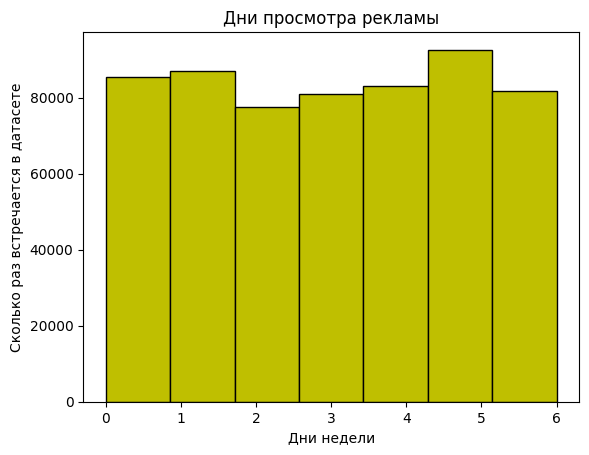

In [ ]:
# Количество дней с наибольшим числом рекламы - most ads day

# Благодаря предыдущим преобразованиям, порядок дней недели и чисел совпадает:
# Sunday - 0, Monday - 1, ... Saturday - 6
plt.hist(days_ordered['most ads day'], bins = 7, color = 'y', edgecolor = 'black')

plt.xlabel('Дни недели')
plt.ylabel('Сколько раз встречается в датасете')
plt.title('Дни просмотра рекламы')

plt.show()

Согласно диаграмме, больше всего рекламы пользователи видели в пятницу. Однако в целом разница между количеством дней невелика -  соответственно, в каждый из дней было показано примерно одно и то же количество рекламы.

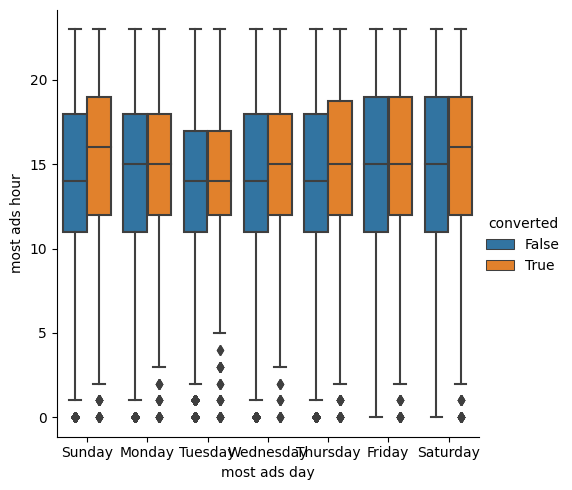

In [ ]:
# Отношение дня, времени рекламы с тем, купил пользователь товар или нет
import seaborn as sns
sns.catplot(data = target_marketing, x = "most ads day", y = "most ads hour", hue = 'converted', kind = "box")

Получился достаточно интересный график. Во-первых, он наглядно показывает, что вечерние часы (примерно с 19 до 23) в датасете встречаются часто и находятся в пределах нормы, в отличие от ночных и раннеутренних часов, которые почти везде попадают в выбросы.

Во-вторых, график подчеркивает отсутствие значимой зависимости между днем и часом демонстрирования рекламы (все ящики находятся примерно на одном уровне). Этот результат также виден на точечной диаграмме ниже.

В-третьих, интересно, что медиана данных о часе демонстрирования рекламы различается у пользователей, купивших или же не купивших товар. Медиана у пользователей, купивших товар (True) всегда выше или равна медиане пользователей, не купивших товар (False), то есть в среднем те, кто купил товар, видели рекламу в более позднее время суток.

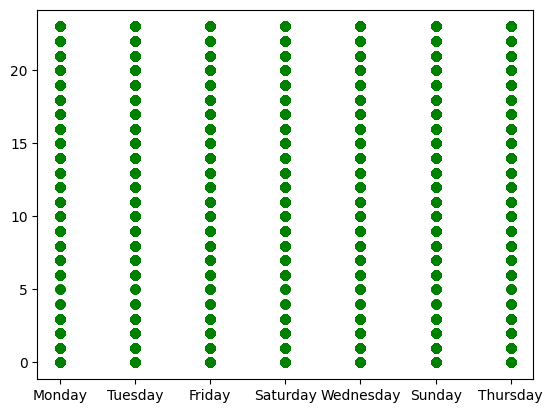

In [ ]:
# Связь дня и часа демонстрирования рекламы (связи нет)
plt.scatter(target_marketing['most ads day'], target_marketing['most ads hour'], alpha=0.5, color='green')

<Axes: >

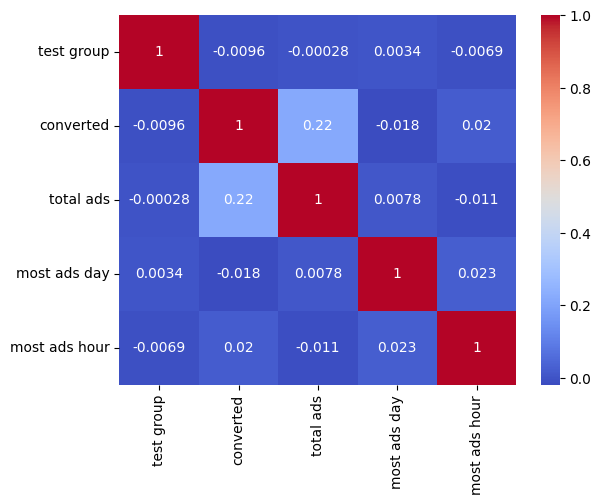

In [ ]:
# Корреляция  между всеми элементами датасета

correlation_matrix = days_ordered.corr()

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

Коррелограмма нагладно демонстрирует отсутствие тесных связей между элементами датасета. Самая тесная из всех - положительная связь между количеством увиденной рекламы и покупкой товара, однако и она очень слабая.

## IV. Проверка связи размещения рекламы и покупаемости товара

*Если честно, я нашла для этого готовый код. Я понимаю, что происходит в коде, но сама бы ни за что не додумалась:)

In [ ]:
# Создание переменных для группы пользователей, видевших рекламу, и группы, не видевших ее (а только psa) - столбец test group
# видели рекламу - 0, не видели - 1
ad = days_ordered[days_ordered['test group'] == 0]
psa = days_ordered[days_ordered['test group'] == 1]

ad.head()

,test group,converted,total ads,most ads day,most ads hour
294050,0,0,22,0,17
342262,0,0,20,0,9
342264,0,0,15,0,10
342265,0,0,7,0,9
342266,0,0,5,0,9


In [ ]:
psa.head()

,test group,converted,total ads,most ads day,most ads hour
83698,1,0,28,0,13
83070,1,0,9,0,21
83061,1,0,1,0,20
83018,1,0,2,0,20
83045,1,0,2,0,20


In [ ]:
# Подсчет доли купивших товар пользователей в каждой из групп
ad_converted = ad ['converted'].mean()
psa_converted = psa ['converted'].mean()

print(ad_converted,psa_converted)

0.025546559636683747 0.01785410644448223


Таким образом, 2,55% процента пользователей, видевших рекламу, купили товар. Среди не видевших рекламу товар купили всего 1,79%.

Этот результат необходимо проверить другом датасете (sample), чтобы понять, случаен наш результат или нет.

<Axes: ylabel='Density'>

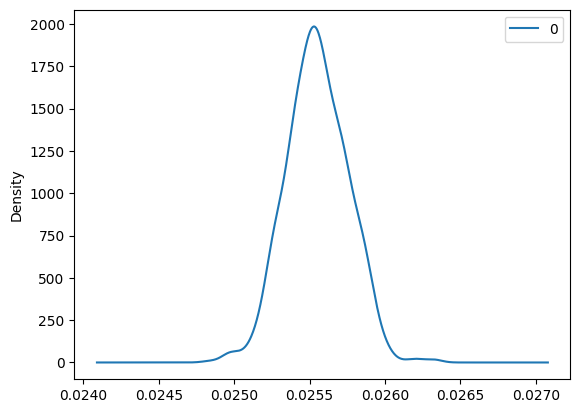

In [ ]:
# Создание sample dataset для группы пользователей, видевших рекламу
boot_ad = []

for i in range (1000):
    boot_mean = ad.sample(frac = 1,replace = True)['converted'].mean()
    boot_ad.append(boot_mean)


boot_ad = pd.DataFrame(boot_ad)

boot_ad.plot(kind = 'density')

Данные датасета соответствуют нормальному распределению.

<Axes: ylabel='Density'>

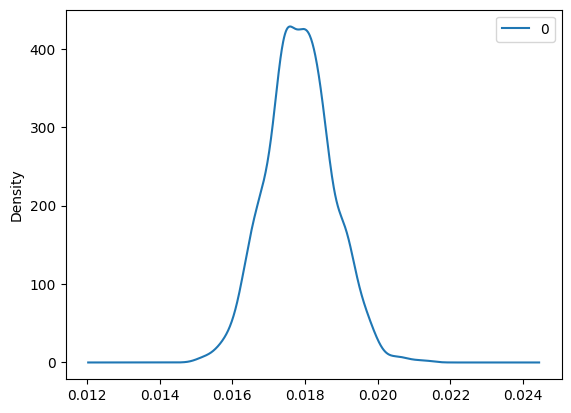

In [ ]:
# Создание sample dataset для группы пользователей, не видевших рекламу
boot_psa = []

for i in range(1000):
    boot_mean = psa.sample(frac = 1,replace = True)['converted'].mean()
    boot_psa.append(boot_mean)

boot_psa = pd.DataFrame(boot_psa)
boot_psa.plot(kind = 'density')

Данные датасета соответствуют нормальному распределению.

In [ ]:
# Создание табличек
boot_ad.columns = ['ad_converted']
boot_psa.columns = ['psa_converted']
boot_psa.head()

,psa_converted
0,0.018194
1,0.018534
2,0.018067
3,0.017812
4,0.018279


In [ ]:
# Совмещение двух датасетов
boot_strap = pd.concat([boot_ad, boot_psa], axis = 1)
boot_strap.head(10)

,ad_converted,psa_converted
0,0.025242,0.018194
1,0.025711,0.018534
2,0.025672,0.018067
3,0.025798,0.017812
4,0.025747,0.018279
5,0.025708,0.017472
6,0.025756,0.017259
7,0.025378,0.017812
8,0.025559,0.016409
9,0.025531,0.017386


In [ ]:
boot_strap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_converted   1000 non-null   float64
 1   psa_converted  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
# Создание столбца с разницей между двумя группами
boot_strap['diff'] = (boot_strap['ad_converted'] - boot_strap['psa_converted']) / boot_strap['psa_converted']
boot_strap.head(10)

,ad_converted,psa_converted,diff
0,0.025242,0.018194,0.387361
1,0.025711,0.018534,0.387230
2,0.025672,0.018067,0.420978
3,0.025798,0.017812,0.448386
4,0.025747,0.018279,0.408525
5,0.025708,0.017472,0.471409
6,0.025756,0.017259,0.492300
7,0.025378,0.017812,0.424818
8,0.025559,0.016409,0.557640
9,0.025531,0.017386,0.468416


Text(0.5, 1.0, '% разница в покупаемости товаров у ads и psa')

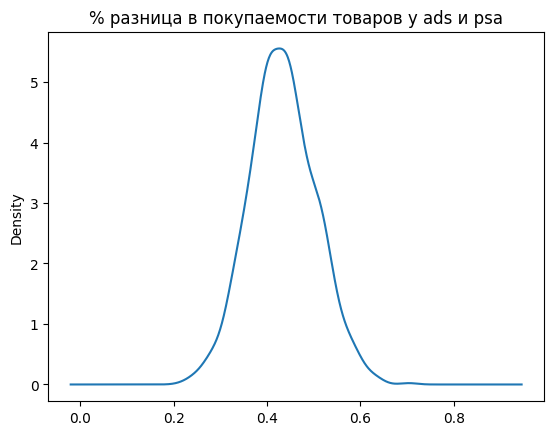

In [ ]:
# Визуализация разницы
ax = boot_strap['diff'].plot(kind = 'density')
ax.set_title('% разница в покупаемости товаров у ads и psa')

In [ ]:
# Расчет вероятности того, что купленных товаров в группе ad больше, чем в группе psa
(boot_strap['diff']>0).mean()

1.0

Результат 1.0 означает, что купленных товаров в группе ad всегда больше, чем в группе psa.

Теперь нужно провести t-тест, чтобы посчитать статистическую значимость результата.

In [ ]:
# Проведение t-теста
from scipy import stats

boot_ad_converted = boot_strap['ad_converted']
boot_psa_converted = boot_strap['psa_converted']

t_stat, p_value = stats.ttest_ind(boot_ad_converted, boot_psa_converted, alternative = 'greater', equal_var = False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 261.4375096632508
P-value: 0.0


Значение p меньше 0.05, следовательно, разница в количестве купленных товаров в двух группах **статистически значима**.

Соответственно, есть основания отвергать нулевую гипотезу и утверждать, что размещение рекламы действительно способствует продаваемости товаров.

## V. Выводы по проекту

Таким образом, по результатам исследования подтвердилась альтернативная гипотеза: размещение рекламы на сайте действительно способствует продаваемости продукта. При этом конкретного фактора, влияющего на этот процесс, не найдено: между всеми данными датасета отсутствовала значимая связь.

Можно только подчеркнуть, что количество увиденной пользователем рекламы сильно разнилось. Из всех параметров именно количество рекламы оказалось наиболее тесно связано с покупаемостью продукта, хотя это все еще слабая связь.

## VI. Выводы по курсу в целом

Этот курс был для меня первым опытом работы с Python, поэтому новым было все)

Виктория Игоревна, спасибо огромное за структурированный курс и за подробный фидбек! Это очень помогало. Сам материал, на мой взгляд, непростой, но вполне постижимый, если делать все домашки и практиковаться. Сложнее всего было разобраться с ООП, но тоже вполне реально)

В процессе работы над конретно этим проектом я узнала об A\B тестировании (до этого никогда с ним не сталкивалась) и вспомнила некоторые моменты из статистики, с которой я знакома совсем чуть-чуть. Самым сложным было разбираться даже не в коде, а в самой статистике:) Навыки обработки данных и использование SciPy.stats могут очень пригодиться в моей работе над анализом речи учителей.

Очень рада, что была возможность пройти этот курс и базово освоить Python! Думаю, мне это еще пригодится)